In [1]:
# import dependencies
from sklearn.preprocessing import LabelEncoder
from sqlalchemy import create_engine
from config import dbConnectionString
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
engine = create_engine(dbConnectionString)

#import dataframe from SQL database
df = pd.read_sql_query('select * from "cardioData"',con=engine)
df = df.drop(columns = ['index', 'id'])
df

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active
0,50.4,Female,168.0,62.0,False,23,110,80,normal,normal,False,False,True
1,55.4,Male,156.0,85.0,True,46,140,90,well above normal,normal,False,False,True
2,51.7,Male,165.0,64.0,True,25,130,70,well above normal,normal,False,False,False
3,47.9,Male,156.0,56.0,False,20,100,60,normal,normal,False,False,False
4,60.0,Male,151.0,67.0,False,30,120,80,above normal,above normal,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,Female,168.0,76.0,False,34,120,80,normal,normal,True,False,True
63912,61.9,Male,158.0,126.0,True,100,140,90,above normal,above normal,False,False,True
63913,52.2,Female,183.0,105.0,True,60,180,90,well above normal,normal,False,True,False
63914,61.5,Male,163.0,72.0,True,32,135,80,normal,well above normal,False,False,False


In [3]:
le = LabelEncoder()
df2 = df.copy()
df2

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active
0,50.4,Female,168.0,62.0,False,23,110,80,normal,normal,False,False,True
1,55.4,Male,156.0,85.0,True,46,140,90,well above normal,normal,False,False,True
2,51.7,Male,165.0,64.0,True,25,130,70,well above normal,normal,False,False,False
3,47.9,Male,156.0,56.0,False,20,100,60,normal,normal,False,False,False
4,60.0,Male,151.0,67.0,False,30,120,80,above normal,above normal,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,Female,168.0,76.0,False,34,120,80,normal,normal,True,False,True
63912,61.9,Male,158.0,126.0,True,100,140,90,above normal,above normal,False,False,True
63913,52.2,Female,183.0,105.0,True,60,180,90,well above normal,normal,False,True,False
63914,61.5,Male,163.0,72.0,True,32,135,80,normal,well above normal,False,False,False


In [4]:
#female = 0, male = 1
df2['gender'] = le.fit_transform(df2['gender'])
df2

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active
0,50.4,0,168.0,62.0,False,23,110,80,normal,normal,False,False,True
1,55.4,1,156.0,85.0,True,46,140,90,well above normal,normal,False,False,True
2,51.7,1,165.0,64.0,True,25,130,70,well above normal,normal,False,False,False
3,47.9,1,156.0,56.0,False,20,100,60,normal,normal,False,False,False
4,60.0,1,151.0,67.0,False,30,120,80,above normal,above normal,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,0,168.0,76.0,False,34,120,80,normal,normal,True,False,True
63912,61.9,1,158.0,126.0,True,100,140,90,above normal,above normal,False,False,True
63913,52.2,0,183.0,105.0,True,60,180,90,well above normal,normal,False,True,False
63914,61.5,1,163.0,72.0,True,32,135,80,normal,well above normal,False,False,False


In [5]:
normal_dic = {
    "normal" : 0,
    "above normal" : 1,
    "well above normal" : 2,
}

true_false_dic = {
    True : 1,
    False : 0,
}

df2['cardiovascular'] = df2['cardiovascular'].apply(lambda x : true_false_dic[x])
df2['smoke'] = df2['smoke'].apply(lambda x : true_false_dic[x])
df2['alchohol'] = df2['alchohol'].apply(lambda x : true_false_dic[x])
df2['active'] = df2['active'].apply(lambda x : true_false_dic[x])

df2['cholestrol'] = df2['cholestrol'].apply(lambda x : normal_dic[x])
df2['gloucose'] = df2['gloucose'].apply(lambda x : normal_dic[x])
df2

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active
0,50.4,0,168.0,62.0,0,23,110,80,0,0,0,0,1
1,55.4,1,156.0,85.0,1,46,140,90,2,0,0,0,1
2,51.7,1,165.0,64.0,1,25,130,70,2,0,0,0,0
3,47.9,1,156.0,56.0,0,20,100,60,0,0,0,0,0
4,60.0,1,151.0,67.0,0,30,120,80,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,0,168.0,76.0,0,34,120,80,0,0,1,0,1
63912,61.9,1,158.0,126.0,1,100,140,90,1,1,0,0,1
63913,52.2,0,183.0,105.0,1,60,180,90,2,0,0,1,0
63914,61.5,1,163.0,72.0,1,32,135,80,0,2,0,0,0


In [6]:
# set X and y values
X = df2.drop(['cardiovascular', 'height', 'weight'], 1).values
y = df2['cardiovascular'].values

In [7]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

scaler= StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# neural net
input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  13
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 8
hidden_nodes_layer4 = 8
hidden_nodes_layer5 = 3

nn_model = tf.keras.models.Sequential()

# first layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=input_features, activation="relu"))

# second layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Fifth layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# check the structure
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 13)                143       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 27        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
Total params: 430
Trainable params: 430
Non-trainable params: 0
________________________________________________________

In [20]:
# compile model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#cp_callback = ModelCheckpoint(
#    filepath= 'checkpoints/weights.{epoch:02d}.hdf5',
#    verbose=1,
#    save_weights_only=True,
#    save_freq=4020)

# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs= 67)

Epoch 1/67
1499/1499 [==============================] - 3s 2ms/step - loss: 0.6057 - accuracy: 0.7034
Epoch 2/67
1499/1499 [==============================] - 2s 2ms/step - loss: 0.5694 - accuracy: 0.7202
Epoch 3/67
1499/1499 [==============================] - 2s 2ms/step - loss: 0.5625 - accuracy: 0.7220
Epoch 4/67
1499/1499 [==============================] - 2s 1ms/step - loss: 0.5590 - accuracy: 0.7228
Epoch 5/67
1499/1499 [==============================] - 2s 1ms/step - loss: 0.5573 - accuracy: 0.7229
Epoch 6/67
1499/1499 [==============================] - 2s 1ms/step - loss: 0.5561 - accuracy: 0.7235
Epoch 7/67
1499/1499 [==============================] - 2s 2ms/step - loss: 0.5552 - accuracy: 0.7232
Epoch 8/67
1499/1499 [==============================] - 2s 2ms/step - loss: 0.5548 - accuracy: 0.7252
Epoch 9/67
1499/1499 [==============================] - 2s 1ms/step - loss: 0.5542 - accuracy: 0.7241
Epoch 10/67
1499/1499 [==============================] - 2s 1ms/step - loss: 0.553

In [21]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

500/500 - 1s - loss: 0.5472 - accuracy: 0.7276
Loss: 0.5472123622894287, Accuracy: 0.7276425361633301


In [22]:
nn_model.save('keras_model/cardio_model.h5')
nn_model.save_weights('keras_model/nn_model.h5')
model_json = nn_model.to_json()
with open("keras_model/nn_model.json", "w") as json_file:
    json_file.write(model_json)
    
# Save scalar info
means = scaler.mean_
vars = scaler.var_
np.save('keras_model/scaler_means', means)
np.save('keras_model/scaler_var', vars)

In [23]:
# retrieve some example values to test against endpoint
y_train[0]

0

In [24]:
y_train[1]

1

In [25]:
X_train_scaled[0]

array([ 0.4262894 ,  0.72249761, -0.37445294, -0.31121212,  0.03189628,
       -0.51861331, -0.39628378, -0.30773688, -0.23297798,  0.49571328])

In [26]:
X_train_scaled[1]

array([ 0.02835102,  0.72249761, -0.22602056,  0.38498714,  1.31851038,
       -0.51861331, -0.39628378, -0.30773688, -0.23297798,  0.49571328])

In [31]:
nn_model.predict(np.array([X_train_scaled[0]]))

array([[0.32054907]], dtype=float32)

In [32]:
nn_model.predict(np.array([X_train_scaled[1]]))

array([[0.58927476]], dtype=float32)

<AxesSubplot:>

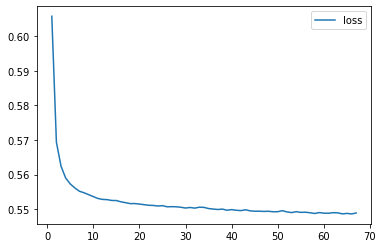

In [27]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

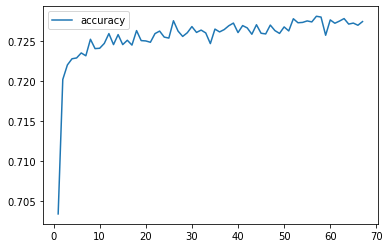

In [28]:
# Plot the accuracy
history_df.plot(y="accuracy")